In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y = np.sin(x)

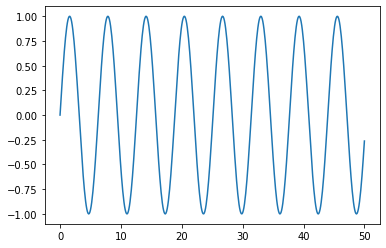

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data = y,index = x,columns = ['sine'])

In [7]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
## train test split is based on a cutoff value
test_per = 0.1

In [9]:
len(df)*test_per

50.1

In [10]:
test_data = np.round(len(df)*test_per)

In [11]:
test_ind = int(len(df)-test_data)

In [12]:
test_ind

451

In [13]:
train = df.iloc[:test_ind]

In [14]:
test = df.iloc[test_ind:]

In [15]:
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [16]:
## because we are feeding the input back to the neuron we need to scale the data
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
train_scale = scaler.transform(train)

In [20]:
test_scaler = scaler.transform(test)

In [21]:
## Keras time series generator class
## Creating batches for training purpose
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 50
batch_size = 1
## Given the length of 2, predict the next 1 item
## the length will take the number of points in the length and will send 1 batch at a time.
## the length can be changed and then it will take the length for the number of 
##items and predict the next.It should be enough to pick up any seasonality effect in the data.
generator = TimeseriesGenerator(train_scale,train_scale,
                               length=length,
                               batch_size=batch_size)

In [23]:
X,y = generator[1] ## returns both the x and y(prediction) for the x

In [24]:
X,y

(array([[[5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
         [2.35078919e-01],
 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [26]:
n_feat = 1

In [27]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length,n_feat)))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [28]:
model.fit(generator,epochs = 5)

Train for 401 steps
Epoch 1/5
401/401 [==============================] - 5s 13ms/step - loss: 0.0144
Epoch 2/5
401/401 [==============================] - 4s 11ms/step - loss: 0.0016
Epoch 3/5
401/401 [==============================] - 4s 10ms/step - loss: 9.5730e-05
Epoch 4/5
401/401 [==============================] - 4s 10ms/step - loss: 1.8134e-05
Epoch 5/5
401/401 [==============================] - 4s 11ms/step - loss: 6.5723e-05


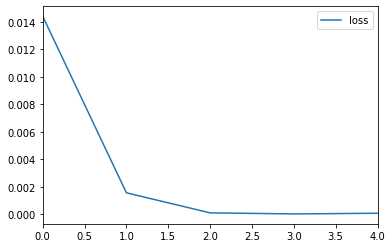

In [29]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [30]:
 first_test = train_scale[-length:]

In [31]:
first_test = first_test.reshape((1,length,n_feat))

In [32]:
model.predict(first_test)

array([[0.95971155]], dtype=float32)

In [33]:
test_scaler[0]

array([0.94955134])

In [35]:
test_pred = []

first_test = train_scale[-length:]
current_record = first_test.reshape((1,length,n_feat)) 

for i in range(len(test)):
    current_pred = model.predict(current_record)[0]
    
    test_pred.append(current_pred)
    current_record = np.append(current_record[:,1:,:],[[current_pred]],axis = 1)

In [36]:
test_pred

[array([0.95971155], dtype=float32),
 array([0.9806949], dtype=float32),
 array([0.99546456], dtype=float32),
 array([1.0057346], dtype=float32),
 array([1.0138116], dtype=float32),
 array([1.014985], dtype=float32),
 array([1.0116377], dtype=float32),
 array([1.0022209], dtype=float32),
 array([0.9883562], dtype=float32),
 array([0.97122705], dtype=float32),
 array([0.9464508], dtype=float32),
 array([0.917413], dtype=float32),
 array([0.8842877], dtype=float32),
 array([0.8477989], dtype=float32),
 array([0.8062087], dtype=float32),
 array([0.7623581], dtype=float32),
 array([0.7161534], dtype=float32),
 array([0.6691421], dtype=float32),
 array([0.62105286], dtype=float32),
 array([0.56981784], dtype=float32),
 array([0.51868397], dtype=float32),
 array([0.4691393], dtype=float32),
 array([0.41863102], dtype=float32),
 array([0.36662236], dtype=float32),
 array([0.3171119], dtype=float32),
 array([0.26921737], dtype=float32),
 array([0.22500397], dtype=float32),
 array([0.18145545],

In [37]:
## back transform the outputs
true_preds = scaler.inverse_transform(test_pred)

In [38]:
test['Pred'] = true_preds

c:\users\saket\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


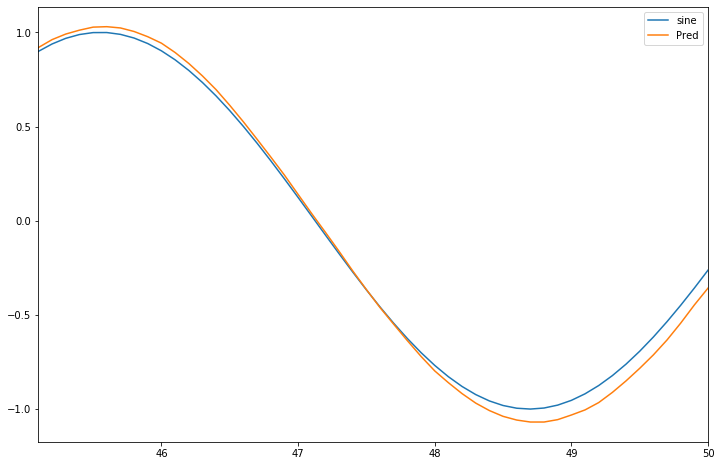

In [39]:
test.plot(figsize = (12,8))

In [40]:
## Early stopping with RNNs
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early = EarlyStopping(monitor='val_loss',patience = 2)

In [45]:
length = 49
generator = TimeseriesGenerator(train_scale,train_scale,length = length,batch_size=1)

validation_gen = TimeseriesGenerator(test_scaler,test_scaler,
                                    length = length,batch_size=1)

In [46]:
model = Sequential()

model.add(LSTM(50,input_shape = (length,n_feat)))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [48]:
model.fit_generator(generator,epochs = 5,
                   validation_data = validation_gen,
                   callbacks = [early])

Epoch 1/5
402/402 [==============================] - 40s 100ms/step - loss: 1.2377e-04 - val_loss: 3.9563e-06
Epoch 2/5
402/402 [==============================] - 39s 97ms/step - loss: 1.8632e-04 - val_loss: 7.7000e-08
Epoch 3/5
402/402 [==============================] - 36s 90ms/step - loss: 9.8684e-05 - val_loss: 1.8033e-06
Epoch 4/5
402/402 [==============================] - 32s 79ms/step - loss: 5.8946e-04 - val_loss: 3.4940e-05


In [49]:
test_pred = []

first_test = train_scale[-length:]
current_record = first_test.reshape((1,length,n_feat)) 

for i in range(len(test)):
    current_pred = model.predict(current_record)[0]
    
    test_pred.append(current_pred)
    current_record = np.append(current_record[:,1:,:],[[current_pred]],axis = 1)

In [50]:
true_pred_lstm = scaler.inverse_transform(test_pred)

c:\users\saket\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


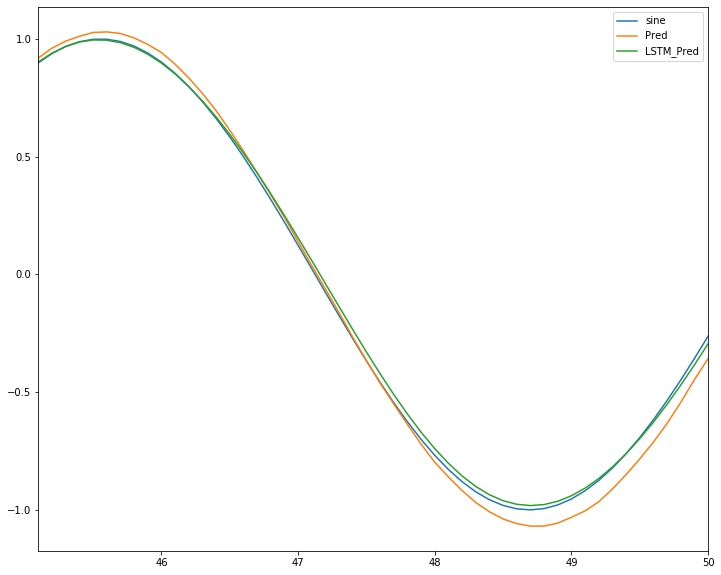

In [51]:
test['LSTM_Pred'] = true_pred_lstm
test.plot(figsize = (12,10))

In [52]:
## Forecasting new data beyond the training and test set
full_scale = MinMaxScaler()
scaled_full = full_scale.fit_transform(df)

In [53]:
generator_full = TimeseriesGenerator(scaled_full,scaled_full,length = length,batch_size = 1)

In [54]:
model = Sequential()

model.add(LSTM(50,input_shape = (length,n_feat)))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss = 'mse')

In [55]:
model.fit_generator(generator_full,epochs = 5,
                   validation_data = validation_gen,
                   callbacks = [early])

Epoch 1/5
452/452 [==============================] - 36s 79ms/step - loss: 0.0159 - val_loss: 1.6465e-04
Epoch 2/5
452/452 [==============================] - 37s 81ms/step - loss: 5.8692e-04 - val_loss: 1.6963e-05
Epoch 3/5
452/452 [==============================] - 38s 84ms/step - loss: 7.1874e-05 - val_loss: 2.1812e-05
Epoch 4/5
452/452 [==============================] - 30s 67ms/step - loss: 1.8207e-04 - val_loss: 8.3243e-06
Epoch 5/5
452/452 [==============================] - 31s 69ms/step - loss: 6.0075e-05 - val_loss: 1.0028e-06


In [58]:
forecast = []

first_test = train_scale[-length:]
current_record = first_test.reshape((1,length,n_feat)) 

for i in range(25):
    current_pred = model.predict(current_record)[0]
    
    forecast.append(current_pred)
    current_record = np.append(current_record[:,1:,:],[[current_pred]],axis = 1)

In [59]:
forecast = scaler.inverse_transform(forecast)
## Creating the forecast index
forecast_index = np.arange(50.1,52.6,step=0.1)

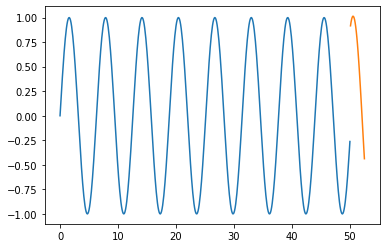

In [62]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)